In [ ]:
from google.colab import drive ; drive.mount('/content/drive')
!pip install gym keras keras-rl2 tensorflow==2.1
import os , sys
import pandas as pd 
from datetime import datetime as dt
import time
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
from numpy import loadtxt
from datetime import datetime
from numpy import savetxt
import random ; from random import randint
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense , Flatten 
from tensorflow.keras.optimizers import Adam
from rl.policy import * ; from rl.memory import * ; from rl.agents import *

In [2]:
#input_shape = ( Memoryin_window_length , ob_space_Length , window )
Memoryin_window_length      = 10
window                      = 360
ob_space_Length             = 5
actions                     = 3
MemoryLimit                 = 200000
NB_Dahabi                   = 1.6180339887
#-----------------------------------------------------------
fee                         = 0.0002
sDay                        = 0
eDay                        = 500
SL                          = 0.0015
TP                          = 0.0015
max_number_trade_per_day    = 20
max_barsM1_per_day          = 1000 + window
max_nb_steps                = 20

In [3]:
os.chdir("/content/drive/MyDrive") 
!ls
name = 'DATA/EURUSD.csv'
M1 = pd.read_csv(name, encoding='utf-16',header=None, names=['Date', 'Close'] )
data = M1['Close'].to_numpy()
len(data)

'Colab Notebooks'   Goold  'visual studio 2015 professional iso'
 DATA		    orari   WSaved


7601433

In [ ]:
N = 50000
start_time = time.time()
stats360 = []
jTime = 0
for i in range(0,N):
  jDATA = data[jTime:(jTime+360+50)]
  jTime+=1
  jstats = get360stats(jDATA)
  stats360.append(jstats)

print('don! in : {} '.format( round(time.time()-start_time,2)))
len(stats360)

don! in : 727.43 


50000

In [ ]:
for i in range(1,2):
  show(stats360[i])

In [ ]:
def get360stats(data):
  length = len(data)
  if (length!=(360+50)):
    print(' get360stats is not 360 + 50 data')
    return 0
  else : 
    stats = np.transpose(  [data , SMA(data,5) , SMA(data,10) , SMA(data,20) , SMA(data,49)     ]  )
    stats = stats[50:length]
    max = stats.max() 
    min = stats.min()
    stats =   stats/(max-min) - min/(max-min) 
    return stats


In [ ]:
def SMA(Data,Periodes):
    #print(' type : {} '.format(type(Data)))
    n = len(Data)-1 
    res = []
    s2 = Data[0]
    res.append(s2)
    for i in range(1,Periodes+1):
        s2 = s2 + Data[i]
        s2 = round( s2/2 ,5 )
        res.append(s2)
        
    for i in range(Periodes,n):
      iSMA = 0
      for j in range(i - Periodes ,i):
        if(j>=n):
          iSMA = iSMA + Data[n]
        else:
          iSMA = iSMA + Data[j]
      iSMA = iSMA/Periodes  
      res.append(iSMA)
    return np.array(res)  

In [ ]:
def show(data):  # data is np
  len1 = len(data)
  plt.figure(figsize=(13, 6))
  x = data[:,0]
  y  = np.arange(start=0, stop=len(x) , step=1) 
  plt.plot(  y ,  x    , label="EURUSD Line" )
  plt.plot(  y ,  data[:,1]  , label="SMA5 Line" )
  plt.plot(  y ,  data[:,2]  , label="SMA10 Line" )
  plt.plot(  y ,  data[:,3]  , label="SMA20 Line" )
  plt.plot(  y ,  data[:,4]  , label="SMA50 Line" )
  plt.show()
  

In [ ]:
#1.46 = 4.18 = 2.72 GB for 140K

In [ ]:
def isShort( min , max ):
  global prices , TP , SL , indexIsmax
  res = -1
  index = 2 # random.randint(1, 3)
  for i in range(min,max):
    if( prices[i] <= (prices[min]-TP) ):
      res = 1
      index = i  - min #+ random.randint(1, 3)
      break
    if( prices[i] >= (prices[min]+SL) ):
      res = 0
      index = i  - min #+ random.randint(1, 3)
      break
    if(i==(max-1) ):
      index = max - min
      indexIsmax+=1
      print('index is max'+str(indexIsmax))
  return [res , index]

In [ ]:
s=0
for i in range(0,1):
  s+=Short[i,1]
s

20

In [ ]:
indexIsmax = 0
start_time = time.time()
lenData = len(stats360)

prices = M1['Close'][0:lenData].to_numpy()

Short = []  # [ 'Short' ]
step_loop = 600
for i in range(0,lenData - step_loop ):
  Short.append( isShort(i,i+step_loop) )
  
Short = np.array(Short)

print('don! in : {} '.format( round(time.time()-start_time,2)))

index is max1
index is max2
index is max3
index is max4
index is max5
index is max6
index is max7
index is max8
index is max9
index is max10
index is max11
index is max12
index is max13
index is max14
index is max15
index is max16
index is max17
index is max18
index is max19
index is max20
index is max21
index is max22
index is max23
index is max24
index is max25
index is max26
index is max27
index is max28
index is max29
index is max30
index is max31
index is max32
index is max33
index is max34
index is max35
index is max36
index is max37
index is max38
index is max39
index is max40
index is max41
index is max42
index is max43
index is max44
index is max45
index is max46
index is max47
index is max48
index is max49
index is max50
index is max51
index is max52
index is max53
index is max54
index is max55
index is max56
index is max57
index is max58
index is max59
index is max60
index is max61
index is max62
index is max63
index is max64
index is max65
index is max66
index is max67
inde

In [ ]:
u=0
y=0
z=0
for i in range( 0,len(Short) ):
  if Short[i,0]==1 :
    u+=1
  if Short[i,0]==0 :
    y+=1 
  if Short[i,0]==-1 :
    z+=1 
u,y,z

(25236, 24083, 81)

In [ ]:
class testingenv(Env ):
    def __init__(self):
         #------------  observation_space  observation_space --------------------------------------------
        global ob_space_Length , window  , stats360 , Short , TP , SL , fee , max_nb_steps , AllReward
        self.observation_space = Box(low= 0.0, high= 1.0, shape=( ob_space_Length ,window), dtype=np.float64 )
        self.action_space = Discrete(2)
        self.iStats = -1
        #------------  Parameters --------------------------------------------
        self.iTime_episode=0

         
    def step(self, action):
        reward = 0
        if(action==0): #sell
          if( Short[ self.iStats,0 ]==1 ):
            reward =  TP*10000 - fee*10000
          if( Short[ self.iStats,0 ]==0 ):
            reward = -SL*10000 - fee*10000
          self.iStats += Short[ self.iStats , 1 ] + random.randint(1, 3)

        if(action==1):# Buy
          #Buy don!     
          if( Short[ self.iStats,0 ]==0 ):
            reward =  TP*10000 - fee*10000
          if( Short[ self.iStats,0 ]==1 ):
            reward = -SL*10000 - fee*10000           
          self.iStats += Short[ self.iStats,1 ] + random.randint(1, 3)
          
            
        info_ = {}
        self.iStats+=random.randint(1, 3)
        if(self.iStats>=len(Short)-360):
          self.iStats=random.randint(1, 3)
        self.state = stats360[self.iStats]
        self.state = np.transpose(self.state)
        self.iTime_episode+=1
        done = False
        if( self.iTime_episode>=max_nb_steps ):
          done = True
        AllReward.append(reward)
        return self.state, reward, done, info_
    def render(self):
        g=0
    def resetiStats(self,u): 
         self.iStats=u
    def reset(self):
        #print('XXXXXL')
        print('iStats :{} '.format(self.iStats))
        self.iStats+=random.randint(10, 50)
        self.iTime_episode=0
        self.state = stats360[self.iStats]
        self.state = np.transpose(self.state)
        if(self.iStats>=len(Short)-360):
          self.iStats=random.randint(10, 50)

        return self.state
#-----------------------------------------------------------------
env = testingenv(  )

In [ ]:
def build_model( ob_space_Length,window , actions,Memoryin_window_length):
    model = Sequential()
    model.add(Dense(128,activation='relu', input_shape=(Memoryin_window_length,ob_space_Length,window) ) )
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Flatten())
    model.add(Dense(actions))
    return model    
def build_agent(model, actions,Memoryin_window_length):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.2, nb_steps=10000)
    memory = SequentialMemory(limit= MemoryLimit , window_length=Memoryin_window_length)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  enable_dueling_network=True, dueling_type='avg', 
                   nb_actions=actions, nb_steps_warmup=1000 ,
                   gamma=0.95 
                  )
    return dqn   


In [ ]:

model = build_model(ob_space_Length, window, actions,Memoryin_window_length)
model.summary()
dqn = build_agent(model, actions,Memoryin_window_length)
dqn.compile( Adam(lr=1e-4))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10, 5, 128)        46208     
_________________________________________________________________
dense_1 (Dense)              (None, 10, 5, 256)        33024     
_________________________________________________________________
dense_2 (Dense)              (None, 10, 5, 256)        65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10, 5, 128)        32896     
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 19203     
Total params: 197,123
Trainable params: 1

In [ ]:
del model

In [ ]:
FileVersion = "WSaved/V67/"
time = datetime.now()
time = time.strftime("%H-%M-%S")
render = 0
steps = 2000
Looping = 1
NameSaving = "testing"
for i in range(0,Looping):
  dqn.fit(env, nb_steps=steps, visualize=False, verbose=2)
  time_ = datetime.now()
  time_ = time_.strftime("%H-%M-%S")
  NameSaving = FileVersion+time_+'/' +"WSaveddqn_"+str(time_)+".h5f"
  print('IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII') 
  print(NameSaving)
  print('IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII')
  dqn.save_weights(NameSaving, overwrite=True)

# ***Testing Models***

In [ ]:
#input_shape = ( Memoryin_window_length , ob_space_Length , window )
Memoryin_window_length      = 10
window                      = 360
ob_space_Length             = 5
actions                     = 3
MemoryLimit                 = 200000
NB_Dahabi                   = 1.6180339887
#-----------------------------------------------------------
fee                         = 0.0002
sDay                        = 0
eDay                        = 500
SL                          = 0.0015
TP                          = 0.0015
max_number_trade_per_day    = 400
max_barsM1_per_day          = 1000 + window
max_nb_steps                = 400
env = testingenv(  )

In [ ]:
modelmax = build_model(ob_space_Length, window, actions,Memoryin_window_length)
dqnmax = build_agent(modelmax, actions,Memoryin_window_length)
dqnmax.compile( Adam(lr=1e-4))
#name  = 'DATA/19-18-24/WSaveddqn_19-18-24.h5f'
name  = 'DATA/m1_440K/WSaveddqn_15-26-24.h5f'
dqnmax.load_weights(name) 

Testing for 2 episodes ...
iStats :-1 
Episode 1: reward: 1890.000, steps: 400
iStats :27834 
Episode 2: reward: 1383.000, steps: 400


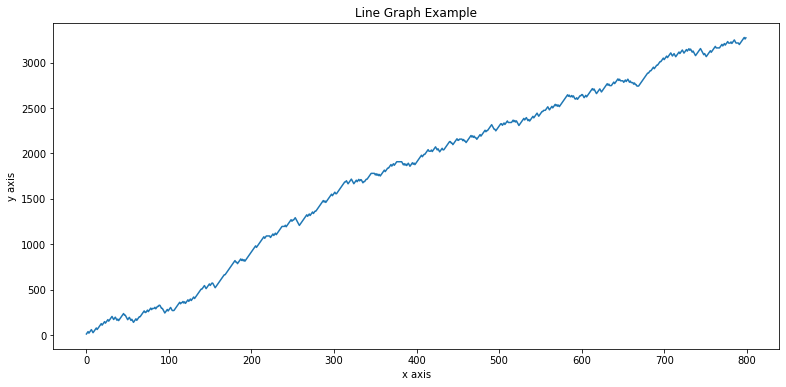

In [ ]:
AllReward = []
_ = dqnmax.test(env, nb_episodes=2, visualize=False ,  )
ShowV3()

Testing for 1 episodes ...
iStats :54367 
Episode 1: reward: 18704.000, steps: 6000


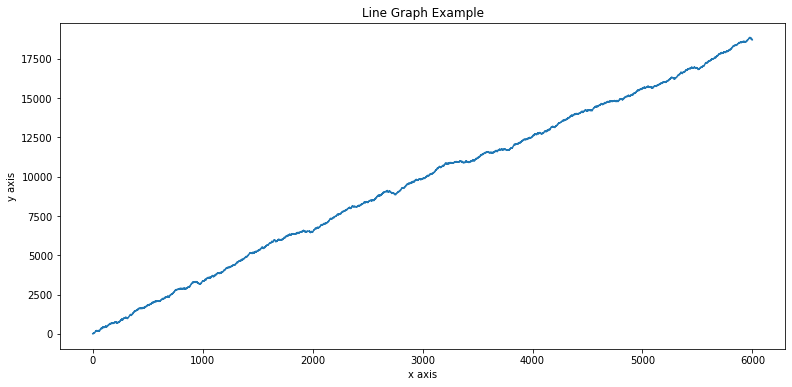

In [ ]:
AllReward = []
_ = dqnmax.test(env, nb_episodes=1, visualize=False ,  )
ShowV3()

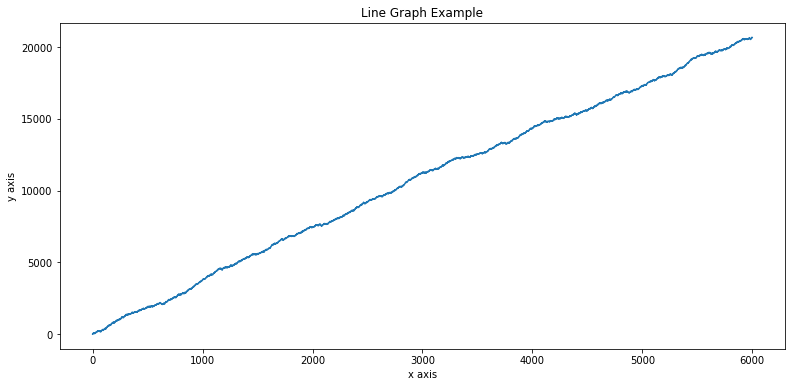

In [ ]:
def ShowV3():
  R = AllReward
  x = []
  s = 0
  for i in range(0,len(R)):
    s = s + R[i]
    x.append(s)
  y = np.arange(0,len(R) ) 
  plt.figure(figsize=(13, 6))
  plt.plot( y, x, label="US30 Line") 
  plt.xlabel("x axis")
  plt.ylabel("y axis")
  plt.title("Line Graph Example")
  plt.show()  # 200
ShowV3()

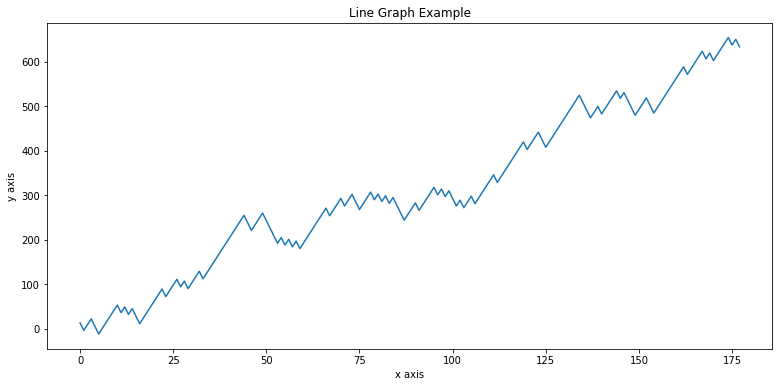

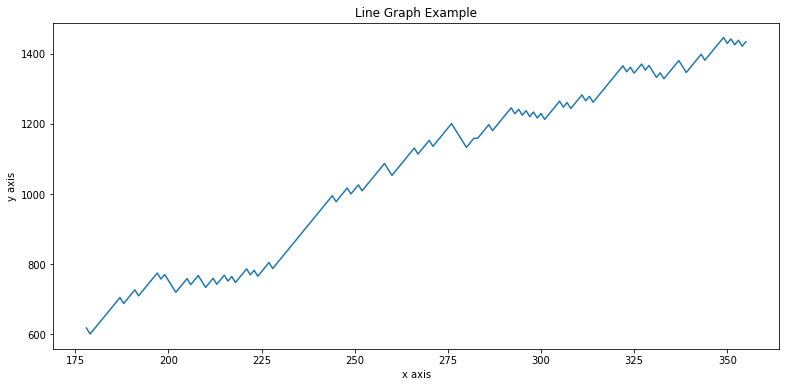

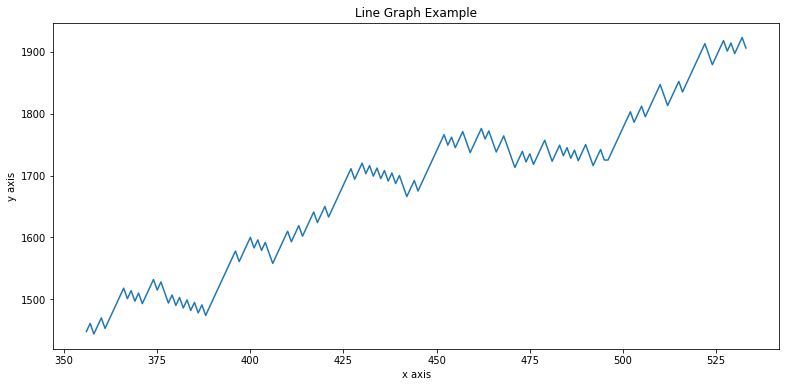

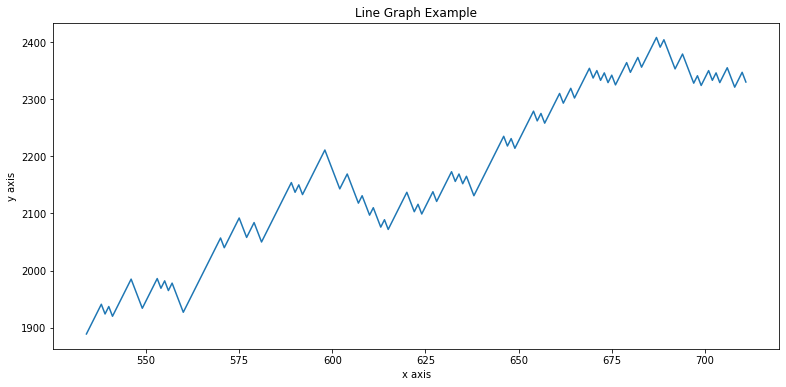

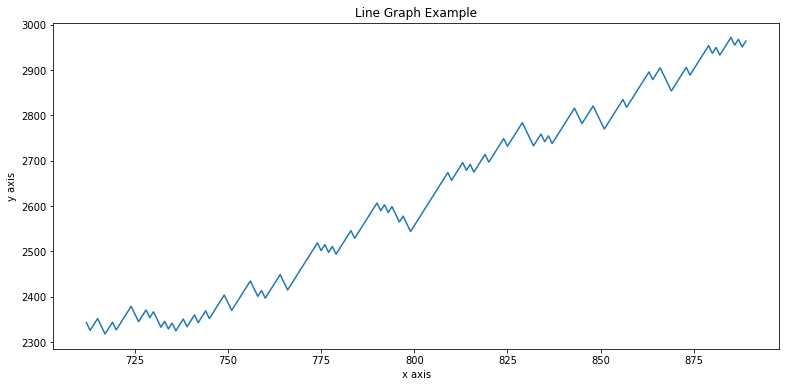

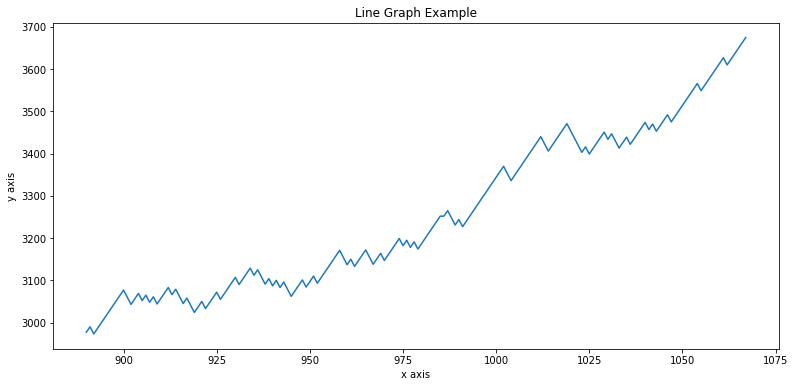

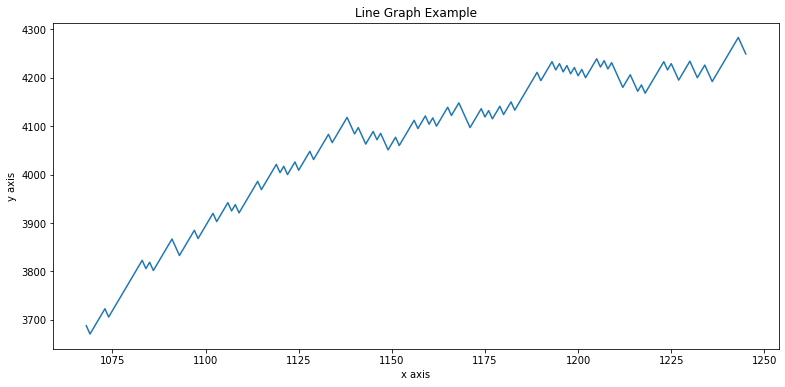

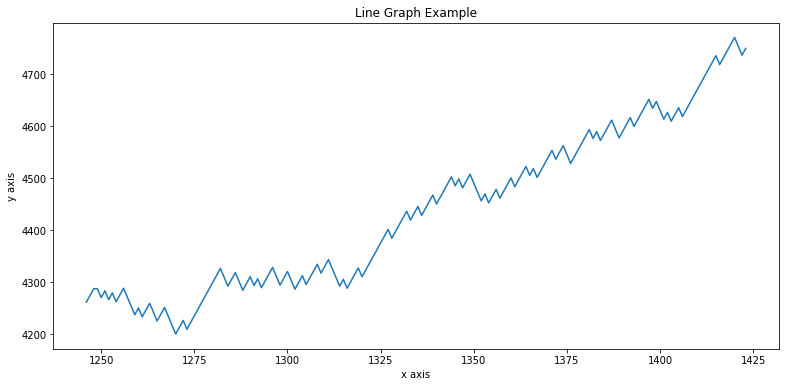

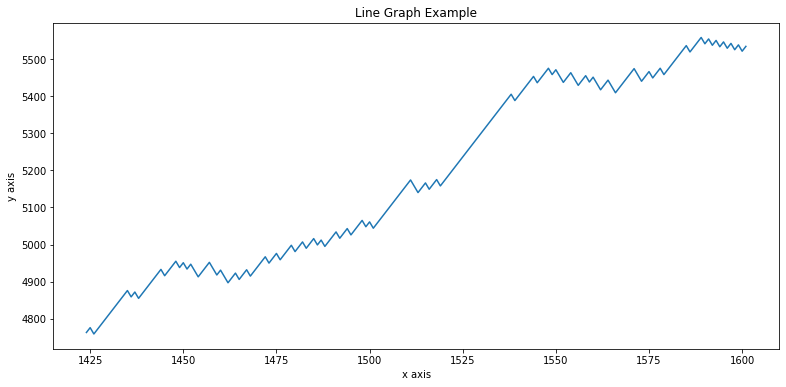

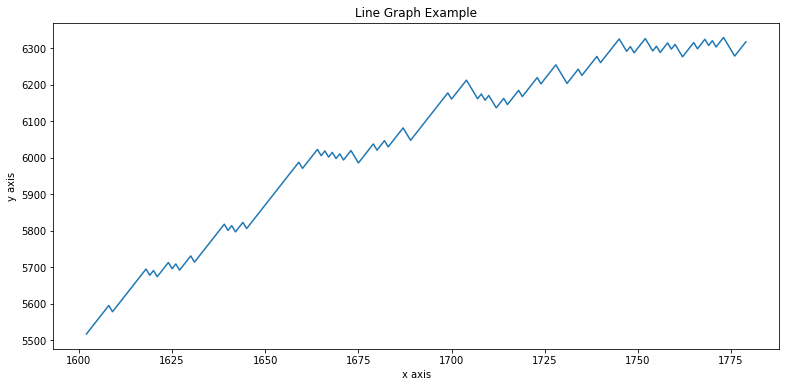

In [ ]:
k = 10
l = 0
for i in range(0,k):
  m = int (len(x)/k )
  x1 = x[ l:(m + m*i) ]
  y1 = y[ l:(m + m*i) ]
  plt.figure(figsize=(13, 6))
  plt.plot( y1, x1, label="US30 Line") 
  plt.xlabel("x axis")
  plt.ylabel("y axis")
  plt.title("Line Graph Example")
  plt.show()  # 200
  l = (m + m*i)

# ***Testing ENV ***

In [ ]:
len(stats360),len(Short),len(prices)

(169300, 169300, 170000)

In [ ]:
def showV2(data,i1,i2,j1,j2):  # data is np
  len1 = len(data)
  plt.figure(figsize=(13, 7))
  x = data[:]
  y  = np.arange(start=0, stop=len(x) , step=1) 
  plt.plot(  y ,  x    , label="EURUSD Line" )
  xtik = np.arange(start= min(x) , stop=max(x) , step=0.001) 
  plt.yticks(xtik)
  plt.plot(  i1 , i2 ,  marker='.', markersize=16, color="darkgreen") 
  plt.plot(  j1 , j2 ,  marker='*', markersize=16, color="green") 
  plt.show()

 Open in : 1.0165 ==> 1.0146 Short : 1 
 Dif : -0.0019000000000000128 


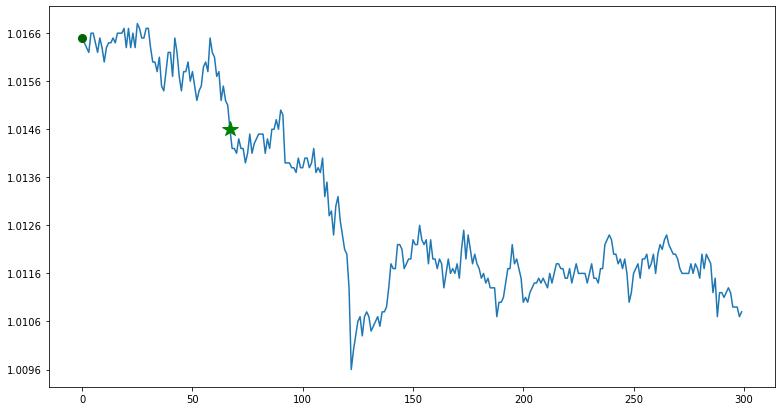

 Open in : 1.0163 ==> 1.0147 Short : 1 
 Dif : -0.0016000000000000458 


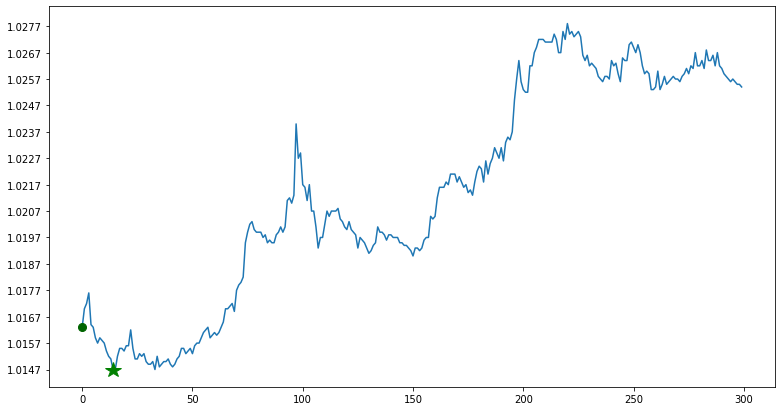

 Open in : 1.0252 ==> 1.0236 Short : 1 
 Dif : -0.0015999999999998238 


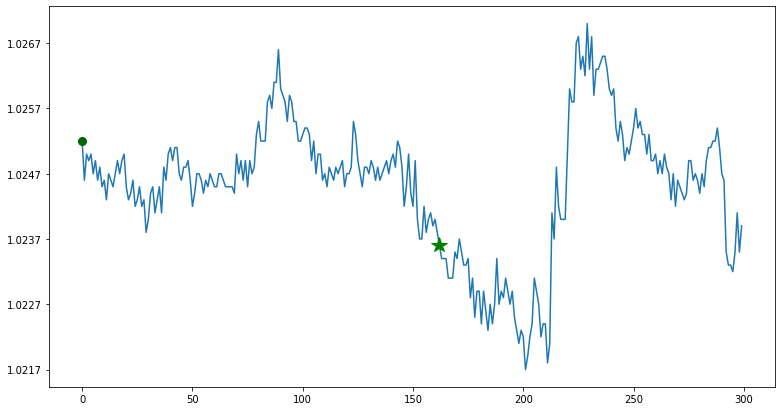

 Open in : 1.0222 ==> 1.0241 Short : 0 
 Dif : 0.0019000000000000128 


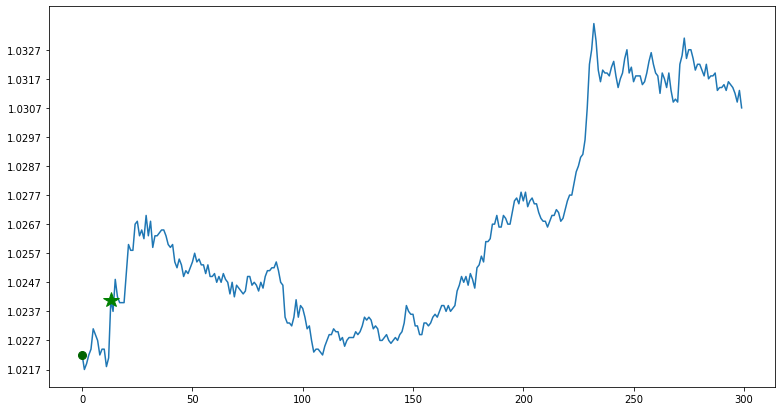

 Open in : 1.0293 ==> 1.0276 Short : 1 
 Dif : -0.0017000000000000348 


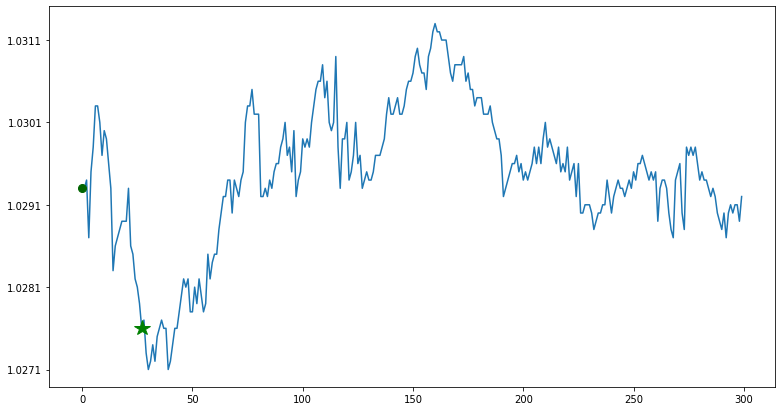

 Open in : 1.0294 ==> 1.031 Short : 0 
 Dif : 0.0015999999999998238 


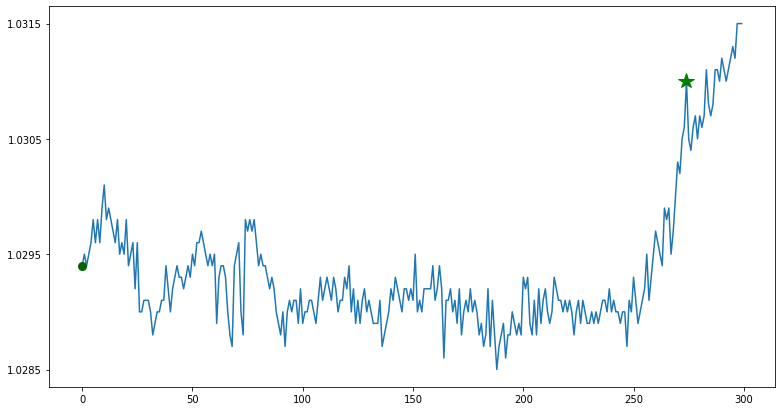

 Open in : 1.0321 ==> 1.0339 Short : 0 
 Dif : 0.0018000000000000238 


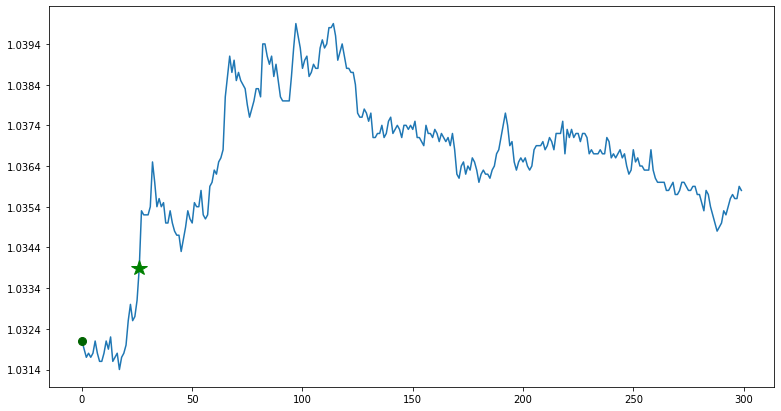

 Open in : 1.0366 ==> 1.035 Short : 1 
 Dif : -0.0016000000000000458 


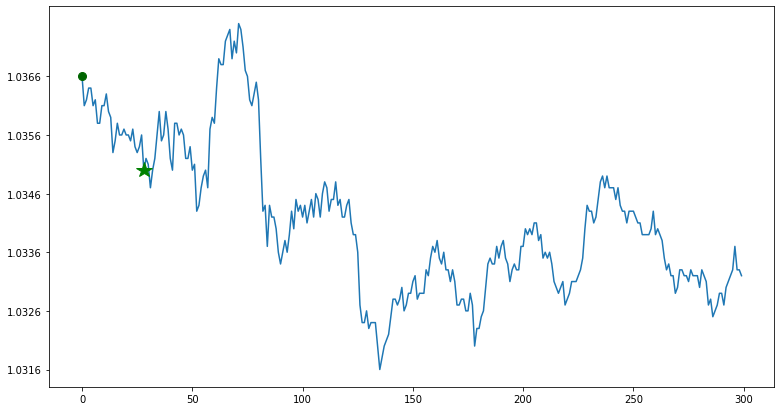

 Open in : 1.0318 ==> 1.0333 Short : 0 
 Dif : 0.0015000000000000568 


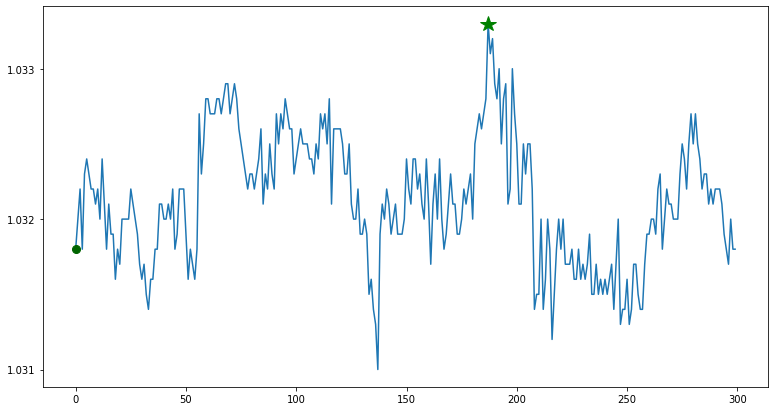

 Open in : 1.0336 ==> 1.0352 Short : 0 
 Dif : 0.0015999999999998238 


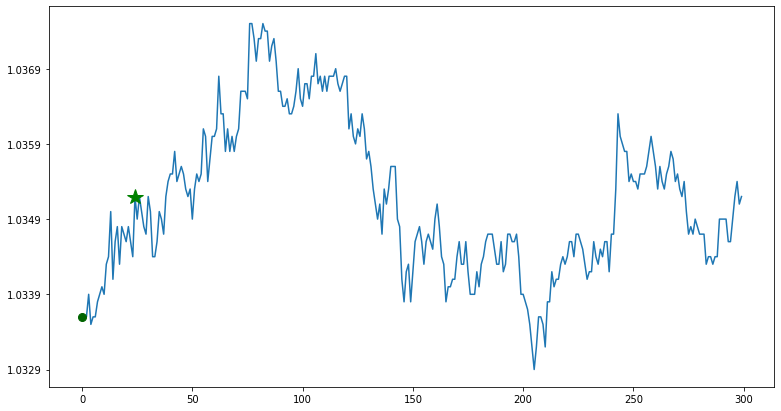

In [ ]:
lengday = 300
j = 100
for l in range(0,10):
  j +=  random.randint(1, 3)*200
  pricesj = prices[j:(j+lengday)]
  i1 = 0
  i2 = prices[j]
  j1 = Short[j,1] 
  j2 = pricesj[Short[j,1] ]
  print(' Open in : {} ==> {} Short : {} '.format(i2,j2,Short[j,0]))
  print(' Dif : {} '.format( j2-i2 ))
  showV2(pricesj,i1,i2,j1,j2)


In [ ]:
Short[10000,1]

10045

# ***Live***

In [ ]:
class live_env(Env ):
    def __init__(self):
         #------------  observation_space  observation_space --------------------------------------------
        global ob_space_Length , window  , stats360 , Short , TP , SL , fee , max_nb_steps , AllReward
        self.observation_space = Box( low= 0.0 , high= 1.0, shape=( ob_space_Length ,window), dtype=np.float64 )
        self.action_space = Discrete(2)
        self.iStats = -1
        #------------  Parameters --------------------------------------------
        self.iTime_episode=0

         
    def step(self, action):
        reward = 0
        if(action==0): #sell
          if( Short[ self.iStats,0 ]==1 ):
            reward =  TP*10000 - fee*10000
          if( Short[ self.iStats,0 ]==0 ):
            reward = -SL*10000 - fee*10000
          self.iStats += Short[ self.iStats , 1 ] + random.randint(1, 3)
          AllReward.append(reward)

        if(action==1):# Buy
          #Buy don!     
          if( Short[ self.iStats,0 ]==0 ):
            reward =  TP*10000 - fee*10000
          if( Short[ self.iStats,0 ]==1 ):
            reward = -SL*10000 - fee*10000           
          self.iStats += Short[ self.iStats,1 ] + random.randint(1, 3)
          AllReward.append(reward)
        
        info_ = {}
        self.iStats+=random.randint(1, 3)
        if(self.iStats>=len(Short)-360):
          self.iStats=random.randint(1, 3)
        self.state = stats360[self.iStats]
        self.state = np.transpose(self.state)
        self.iTime_episode+=1
        done = False
        if( self.iTime_episode>=max_nb_steps ):
          done = True
        #print('XXXXXL2')  
        return self.state, reward, done, info_
    def render(self):
        g=0
    def resetiStats(self,u): 
         self.iStats=u
    def reset(self):
        #print('XXXXXL')
        print('iStats :{} '.format(self.iStats))
        self.iStats+=random.randint(1, 3)
        self.iTime_episode=0
        self.state = stats360[self.iStats]
        self.state = np.transpose(self.state)
        if(self.iStats>=len(Short)-360):
          self.iStats=random.randint(1, 3)

        return self.state
#-----------------------------------------------------------------
env = testingenv(  )